<a href="https://colab.research.google.com/github/suhwankweon/Reinforcement/blob/main/SARSA%EC%B5%9C%EC%A2%85(%2B%EC%8B%A0%EB%A2%B0%EB%8F%84)_1211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

에피소드 100, 스코어 -607.0, epsilon 0.296, 처음~현재 에피소드까지 소요시간 0분 15초
에피소드 200, 스코어 -350.0, epsilon 0.292, 처음~현재 에피소드까지 소요시간 0분 23초
에피소드 300, 스코어 -672.0, epsilon 0.288, 처음~현재 에피소드까지 소요시간 0분 30초
에피소드 400, 스코어 -555.0, epsilon 0.284, 처음~현재 에피소드까지 소요시간 0분 36초
에피소드 500, 스코어 -476.0, epsilon 0.280, 처음~현재 에피소드까지 소요시간 0분 40초
에피소드 600, 스코어 -534.0, epsilon 0.276, 처음~현재 에피소드까지 소요시간 0분 46초
에피소드 700, 스코어 -423.0, epsilon 0.273, 처음~현재 에피소드까지 소요시간 0분 52초
에피소드 800, 스코어 -407.0, epsilon 0.269, 처음~현재 에피소드까지 소요시간 0분 56초
에피소드 900, 스코어 -412.0, epsilon 0.265, 처음~현재 에피소드까지 소요시간 1분 1초
에피소드 1000, 스코어 -343.0, epsilon 0.261, 처음~현재 에피소드까지 소요시간 1분 5초
에피소드 1100, 스코어 -260.0, epsilon 0.257, 처음~현재 에피소드까지 소요시간 1분 8초
에피소드 1200, 스코어 -258.0, epsilon 0.253, 처음~현재 에피소드까지 소요시간 1분 11초
에피소드 1300, 스코어 -382.0, epsilon 0.249, 처음~현재 에피소드까지 소요시간 1분 15초
에피소드 1400, 스코어 -251.0, epsilon 0.245, 처음~현재 에피소드까지 소요시간 1분 18초
에피소드 1500, 스코어 -249.0, epsilon 0.241, 처음~현재 에피소드까지 소요시간 1분 21초
에피소드 1600, 스코어 -241.0, epsilon 0.237, 처음~현재 에피소드까지 소요시간 1분 24초
에피소드

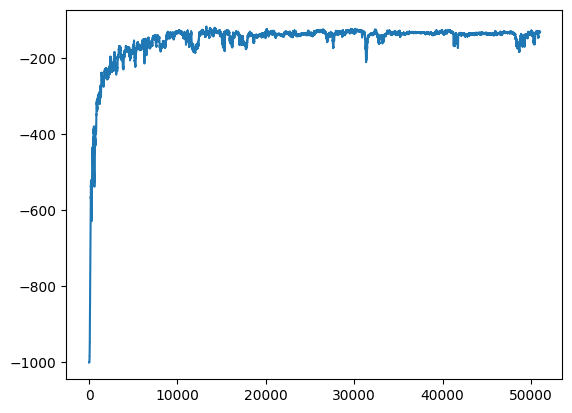

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import time

# 랜덤 시드를 설정하는 함수 추가
def set_random_seed(seed, env):
    np.random.seed(seed)
    env.seed(seed)

# 이산화 구간 결정(Position / Velocity)
def get_state(observation):
    pos, vel = observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

# Q 테이블 업데이트 함수
def update_Q(Q, state, action, reward, state_, action_, alpha, gamma):
    current_Q = Q[state, action]
    next_Q = Q[state_, action_]
    new_Q = current_Q + alpha * (reward + gamma * next_Q - current_Q)
    Q[state, action] = new_Q

# 액션 선택 함수
def select_action(Q, state, epsilon, action_space):
    if np.random.random() < epsilon:
        return np.random.choice(action_space)
    else:
        return max_action(Q, state, action_space)

# 최대값 액션 선택 함수
def max_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state, a] for a in actions])
    action = np.argmax(values)
    return action

# 부트스트랩을 사용하여 평균에 대한 95% 신뢰 구간을 계산하는 함수
def bootstrap_confidence_interval(data, num_samples=1000, alpha=0.05):
    sample_means = []
    n = len(data)

    for _ in range(num_samples):
        # 복원추출로 샘플을 얻어 평균을 계산
        sample = np.random.choice(data, size=n, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # 신뢰 구간 계산
    lower_bound = np.percentile(sample_means, (alpha / 2) * 100)
    upper_bound = np.percentile(sample_means, (1 - alpha / 2) * 100)

    return lower_bound, upper_bound

if __name__ == '__main__':
    random_seed = 42

    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    n_games = 51000
    alpha = 0.1
    gamma = 0.99

    action_space = [0, 1, 2]

    # 환경 상태 공간을 정의합니다.
    pos_space = np.linspace(-1.2, 0.6, 30)
    vel_space = np.linspace(-0.07, 0.07, 30)

    states = [(pos, vel) for pos in range(31) for vel in range(31)]

    # Q 테이블 초기화
    Q = {(state, action): 0 for state in states for action in action_space}

    score = 0
    total_rewards = np.zeros(n_games)
    start_time = time.time()
    max_score = float('-inf')
    max_score_time = 0

    for i in range(n_games):
        # 각 에피소드마다 난수 시드를 설정합니다.
        set_random_seed(random_seed + i, env)

        done = False
        obs = env.reset()
        state = get_state(obs)
        epsilon = max(0.01, min(0.3, 0.3 - 2/n_games * i))

        if i % 100 == 0 and i > 0:
            current_time = time.time() - start_time
            elapsed_min = int(current_time // 60)
            elapsed_sec = int(current_time % 60)
            print(f'에피소드 {i}, 스코어 {score}, epsilon {epsilon:.3f}, 처음~현재 에피소드까지 소요시간 {elapsed_min}분 {elapsed_sec}초')

        score = 0
        action = select_action(Q, state, epsilon, action_space)

        while not done:
            obs_, reward, done, info = env.step(action)
            state_ = get_state(obs_)
            action_ = select_action(Q, state_, epsilon, action_space)

            # Q 테이블에 해당 조합이 없으면 초기화
            if (state_, action_) not in Q:
                Q[state_, action_] = 0

            update_Q(Q, state, action, reward, state_, action_, alpha, gamma)
            state, action = state_, action_
            score += reward

        total_rewards[i] = score

        if score > max_score:
            max_score = score
            max_score_time = time.time() - start_time

    mean_rewards = np.zeros(n_games)
    for t in range(n_games):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])

    # 부트스트랩을 사용하여 95% 신뢰 구간을 계산
    lower_bound, upper_bound = bootstrap_confidence_interval(total_rewards, num_samples=1000, alpha=0.05)
    print(f'평균 스코어 95% 신뢰 구간: ({lower_bound}, {upper_bound})')

    max_score_idx = np.argmax(total_rewards)
    max_score_min = int(max_score_time // 60)
    max_score_sec = int(max_score_time % 60)
    print(f'최고 스코어 에피소드: {max_score_idx}, 스코어: {max_score}, 소요시간: {max_score_min}분 {max_score_sec}초')

    avg_score_total = np.mean(total_rewards[100:50100])
    avg_score_50001_51000 = np.mean(total_rewards[50100:51100])
    print(f'평균 스코어 (Episodes 0 to 50000): {avg_score_total}, 평균 스코어 (Episodes 50001 to 51000): {avg_score_50001_51000}')

    plt.plot(mean_rewards)
    plt.savefig('mountaincar_sarsa.png')
